First lets look at regolith production as that decays with depth.
We need to import some libraries: numpy for maths and matplotlib for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now we can set up our vector for depth:

In [2]:
z = np.linspace(0,20,100)

And then the constants:

In [3]:
m_w = 1
k_w = 10e-6

And then we can calculate production as a function of depth:

In [4]:
P = k_w*np.exp(-m_w*z)

Subsequently we can plot it:

In [5]:
plt.plot(1e3*P,z,'k')
plt.xlabel('Production Rate (mm/yr)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

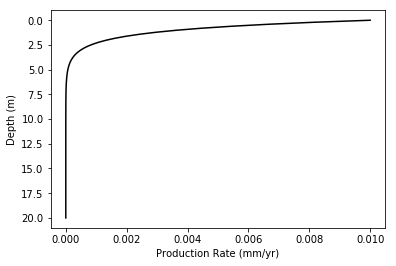

In [6]:
plt.show()

Now lets look at some CRN decay. Set up vector for time:

In [ ]:
t = np.linspace(0,10e6,100)

And then our constants:

In [ ]:
lam = 5e-7
N_0 = 1e-9

And calculate the decay as a function of time:

In [ ]:
N = N_0*np.exp(-lam*t)

Subsequently we can plot it:

In [ ]:
plt.figure()
plt.plot(1e-6*t,N/N_0,'k')
plt.xlabel('Time (Myr)')
plt.ylabel('N/N$_{0}$')

In [ ]:
plt.show()

Now lets add production:

In [ ]:
P = .5
N = P/lam*(1 - np.exp(-lam*t))

And plot:

In [ ]:
plt.figure()
plt.plot(1e-6*t,1e-6*N,'k')
plt.plot(1e-6*t,1e-6*P*t,'--k')
plt.plot(1e-6*t,1e-6*P/lam*np.ones(np.shape(t)),'-.k')
plt.xlabel('Time (Myr)')
plt.ylabel('N (x $10^{6}$)')
plt.ylim(0,1.2)
plt.legend(('N(t)', 'P', 'P/$\lambda$'))

In [ ]:
plt.show()

Now lets look at changing production with time and depth. First lets define all the new constants and reduce the time:

In [ ]:
t = np.linspace(0,2e6,100)

lam = 5e-7
mu = 1
erosion = 0.001e-3
P_0 = 0.5
N_0 = 1e-9

Now we want to define an array to store the values:

In [ ]:
N = np.zeros((100,100))

This time we will loop through time to solve for the depth profile of CRN conentration:

In [ ]:
i = 0
for t_ in t :
    N[:,i] = N_0*np.exp(-lam*t_) + P_0*np.exp(-mu*z)/(lam+mu*erosion) * (1 - np.exp(-(lam+mu*erosion)*t_))
    i += 1

We can make a contour plot of the CRN concentration with time:

In [ ]:
import matplotlib.colors as cls # To make a logarithmic scale

plt.figure()
plt.contourf(1e-3*t,z,N,norm=cls.LogNorm())
plt.gca().invert_yaxis()
plt.xlabel('Time (kyrs)')
plt.ylabel('Depth (m)')
cbar = plt.colorbar()
cbar.set_label('N(z,t) per gram of rock')
plt.show()

In [ ]:
plt.figure()
plt.plot(1e-3*t,1e-6*N[0,:])
plt.xlabel('Time (kyrs)')
plt.ylabel('N(0,t) per gram of rock (x$10^{6}$)')
plt.show()